# Load Nature model

In [1]:
import os
import autokeras as ak
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2    

model1 = load_model("Nature_model_autokeras.h5", custom_objects=ak.CUSTOM_OBJECTS)
model2 = load_model("Nature_model.h5", custom_objects=ak.CUSTOM_OBJECTS)

In [2]:
# model1.summary()

In [3]:
# model2.summary()

# Preprocess Image

In [4]:
def preprocess(data_dir):
    batch_size = 1
    img_height = 180
    img_width = 180

    train_data = ak.image_dataset_from_directory(
        data_dir,
        # Use 20% data as testing data.
        validation_split=None,
        subset="training",
        # Set seed to ensure the same split when loading testing data.
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size)
    return train_data

In [64]:
path = "D:\\Images\\ds1\\intel-image-classification\\pred2"

In [65]:
# images = []

# count = 0
# # for img in os.listdir(path)[:5]:
# for img in os.listdir(path)[:60]:
#     img = preprocess(os.path.join(path,img))        
#     images.append(img)

#     count = count + 1
#     print(count,end='  ')

In [66]:
data= preprocess(path)

Found 9 files belonging to 1 classes.


In [67]:
# images = np.array(images)

In [68]:
pred = model2.predict(data).round(2)
print(pred)

[[0.05 0.02 0.   0.87 0.05 0.  ]
 [0.99 0.   0.   0.   0.   0.  ]
 [0.   0.99 0.   0.   0.   0.01]
 [0.   0.   0.99 0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.  ]
 [0.99 0.   0.   0.   0.   0.01]
 [0.02 0.   0.14 0.03 0.8  0.  ]
 [0.12 0.11 0.04 0.38 0.14 0.22]
 [0.88 0.   0.   0.   0.   0.12]]


In [69]:
pred_categories = tf.argmax(pred, axis=1)

In [70]:
ar = np.asarray(pred_categories)

In [71]:
ar

array([3, 0, 1, 2, 0, 0, 4, 3, 0], dtype=int64)

In [72]:
(unique, counts) = np.unique(ar, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[0 4]
 [1 1]
 [2 1]
 [3 2]
 [4 1]]


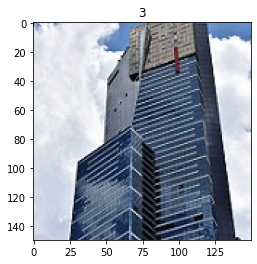

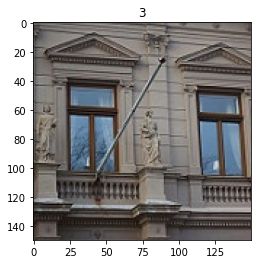

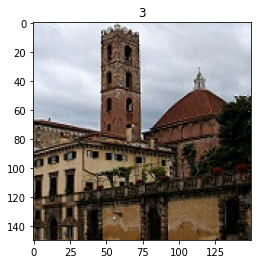

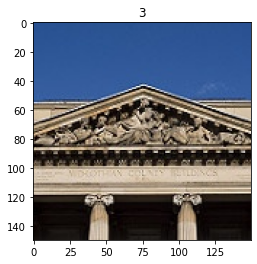

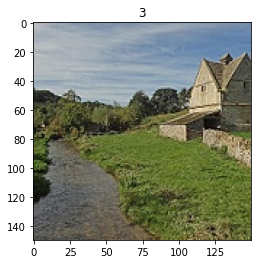

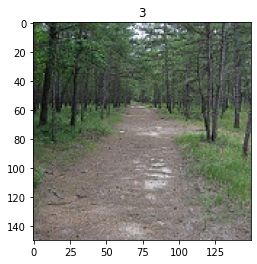

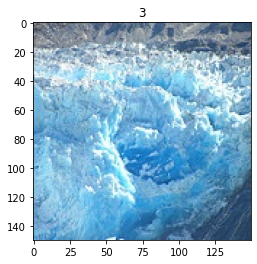

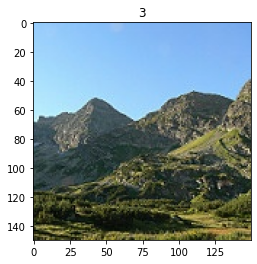

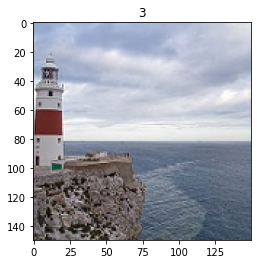

In [86]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def preprocess(path):
    img_array = imread(path)
    return img_array
path1 = "D:\\Images\\ds1\\intel-image-classification\\pred2\\pred"
for img in os.listdir(path1):
    img = preprocess(os.path.join(path1,img))
    plt.title(ar[0])    
    plt.imshow(img)
    plt.show()